In [40]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score

# Load data
data = pd.read_csv('../data/training_set_prepped.csv')
test_set = pd.read_csv('../data/test_set_prepped.csv')

# Split the data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Define the model
rf = RandomForestRegressor()


## Define the K-fold cross validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
   'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30],         # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]         # Method of selecting samples for training each tree
}


'''
#Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=kfold, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

#Fit the grid search to the data
grid_search.fit(X, y)

## Best parameters found
best_params = grid_search.best_params_

## Best estimator with the optimal settings
best_rf = grid_search.best_estimator_
'''

"\n#Create the GridSearchCV object\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, \n                           cv=kfold, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')\n\n#Fit the grid search to the data\ngrid_search.fit(X, y)\n\n## Best parameters found\nbest_params = grid_search.best_params_\n\n## Best estimator with the optimal settings\nbest_rf = grid_search.best_estimator_\n"

In [41]:

#Best parameters found:
best_parameters2 = {'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

new_best_parameters = {'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

 #Best estimator with the optimal settings
best_rf = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=300, min_samples_leaf=2)   


best_rf.fit(X, y)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

In [2]:
# Predict the prices of the test_set
temp = test_set.drop('price', axis=1)
test_set['price_predicted'] = best_rf.predict(temp)

NameError: name 'best_rf' is not defined

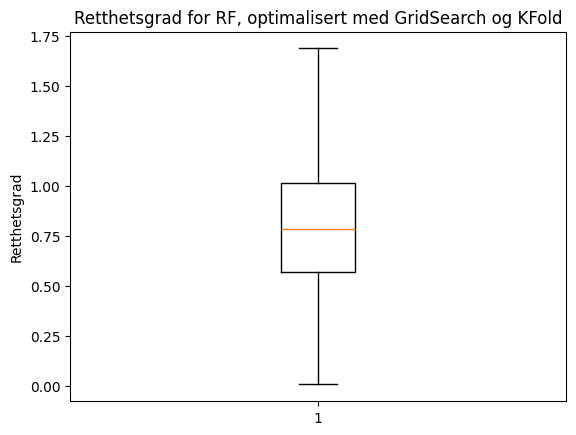

In [4]:
# create a boxplot of the predicted prices divided by the actual prices
plt.boxplot((2**test_set['price_predicted'])/(test_set['price']), showfliers=False)
plt.ylabel('Retthetsgrad')
plt.title('Retthetsgrad for RF, optimalisert med GridSearch og KFold')
plt.show()

In [5]:
best_params

NameError: name 'best_params' is not defined

In [ ]:
best_parameters2

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [4]:
X.dtypes

id                                                int64
host_since                                        int64
host_is_superhost                                 int64
host_total_listings_count                       float64
host_has_profile_pic                              int64
host_identity_verified                            int64
property_type                                     int64
accommodates                                      int64
bedrooms                                        float64
beds                                            float64
maximum_nights                                    int64
number_of_reviews                                 int64
number_of_reviews_ltm                             int64
number_of_reviews_l30d                            int64
review_scores_rating                            float64
instant_bookable                                  int64
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes     

### Comparing neg_mean_squared_error scores for random forest with a baseline model which always predicts the mean to confirm its validity

In [51]:
prediction_set = test_set.drop(['price', 'id'], axis=1)
X_train = X.drop('id', axis=1)


In [52]:
import shap
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


# Assuming you have a DataFrame 'df' with your training data and 'price' as one of the columns

best_rf.fit(X_train, y)
# Create the SHAP explainer and calculate SHAP values for a single instance
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(prediction_set.sample(1000))

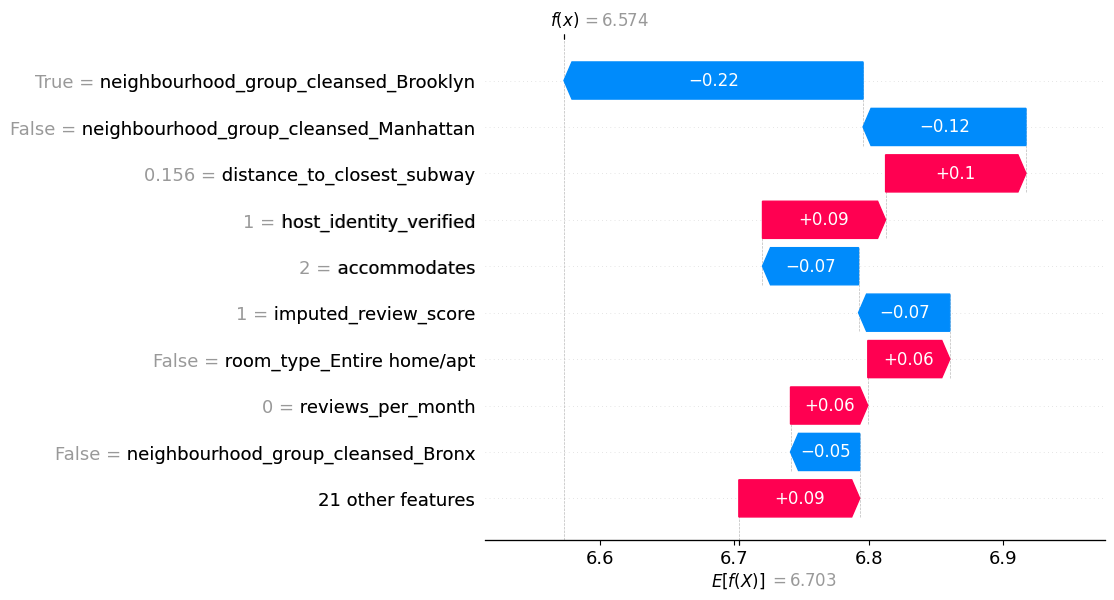

In [120]:
instance_index = 300
shap_values_instance = shap_values[instance_index]

# Plot the SHAP values for that instance using a waterfall plot
shap.initjs()  # Initialize JavaScript visualization in Jupyter Notebook if applicable
shap.waterfall_plot(shap.Explanation(values=shap_values_instance, 
                                     base_values=explainer.expected_value, 
                                     data=X.iloc[instance_index], 
                                     feature_names=X.columns.tolist()))

In [3]:
class MeanRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.mean_ = np.mean(y)
        return self

    def predict(self, X):
        return np.full(shape=(len(X),), fill_value=self.mean_)

In [ ]:
mean_regressor = MeanRegressor()
scores = cross_val_score(mean_regressor, X, y, cv=5, scoring='neg_mean_squared_error')


mse_scores = scores


In [ ]:
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE across the folds: {mean_mse}")
print(f"Standard deviation of MSE across the folds: {std_mse}")

Mean MSE across the folds: -0.8530395873993097
Standard deviation of MSE across the folds: 0.13733419561568339
